In [29]:
# Saiket Systems — Telco Customer Churn Project
# -----------------------------
# 0. Setup & Notes
# -----------------------------
# Dependencies
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

# Set plot aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# -----------------------------
# Cell: 1 — Title (Markdown)
# -----------------------------
# ## Saiket Systems — Customer Segmentation & Churn Analysis
# **Business Analysis Intern:** Premkumar A
# **Project Objective:** Analyze customer churn, segment customers, and provide actionable recommendations to reduce churn.

In [23]:
# -----------------------------
# Cell: 2 — Load data (Task 1)
# -----------------------------
file_path = "/content/Telco_Customer_Churn_Dataset  (3).csv"  # <- change if necessary
print(f"Loading data from: {file_path}")

df_raw = pd.read_csv(file_path)
# Keep a copy of raw data for reference
df = df_raw.copy()

print("\nShape:", df.shape)
print("\nFirst 10 rows:")
display(df.head(10))

print("\nInfo():")
df.info()

# Missing values overview
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df) * 100).round(3)
missing_df = pd.concat([missing_count.rename('missing_count'), missing_percent.rename('percent')], axis=1).sort_values('percent', ascending=False)
print("\nMissing values (count & %):")
display(missing_df)

# Quick target overview
if 'Churn' in df.columns:
    vc = df['Churn'].value_counts(dropna=False)
    vc_pct = (df['Churn'].value_counts(normalize=True, dropna=False) * 100).round(2)
    display(pd.concat([vc.rename('count'), vc_pct.rename('percent')], axis=1))

# Check duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Show columns and dtypes
print("\nColumns and dtypes:")
display(pd.DataFrame(df.dtypes, columns=['dtype']))

# Look for object columns that might be numeric (e.g., TotalCharges)
obj_cols = df.select_dtypes(include='object').columns.tolist()
maybe_numeric = []
for c in obj_cols:
    coerced = pd.to_numeric(df[c], errors='coerce')
    non_na = coerced.notna().sum()
    if non_na > 0:
        maybe_numeric.append((c, non_na, len(df)))

if maybe_numeric:
    print('\nColumns that look numeric but stored as object:')
    for c, good, total in maybe_numeric:
        print(f" - {c}: numeric-like values for {good}/{total} rows")
else:
    print('\nNo obvious object->numeric candidates found.')

Loading data from: /content/Telco_Customer_Churn_Dataset  (3).csv

Shape: (7043, 21)

First 10 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No



Info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null  

,missing_count,percent
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


,count,percent
Churn,,
No,5174,73.46
Yes,1869,26.54



Duplicate rows: 0

Columns and dtypes:


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object



Columns that look numeric but stored as object:
 - TotalCharges: numeric-like values for 7032/7043 rows


In [24]:
# -----------------------------
# Cell: 3 — Task 2: Data Cleaning
# -----------------------------
# 1. Standardize column names
original_columns = df.columns.tolist()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print('\nRenamed columns (sample):')
print(pd.DataFrame({'original': original_columns, 'cleaned': df.columns}))

# 2. Convert TotalCharges to numeric (common issue)
if 'totalcharges' in df.columns:
    df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
    print('\nConverted totalcharges to numeric. Missing after conversion:', df['totalcharges'].isnull().sum())

# 3. Handle missing values: choose strategy
# For this dataset, rows with missing TotalCharges are usually customers with tenure 0 or bad entries — we'll drop them.
if df['totalcharges'].isnull().sum() > 0:
    df = df.dropna(subset=['totalcharges']).reset_index(drop=True)
    print('Dropped rows with NaN totalcharges. New shape:', df.shape)

# 4. Remove duplicates
dup_before = df.duplicated().sum()
if dup_before > 0:
    df = df.drop_duplicates().reset_index(drop=True)
print('Duplicates dropped (if any). Remaining duplicates:', df.duplicated().sum())

# 5. Trim whitespace in object columns and standardize text
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

# 6. Convert 'seniorcitizen' to category (0/1 -> No/Yes)
if 'seniorcitizen' in df.columns:
    # some datasets use 0/1; convert to 'Yes'/'No' to keep consistency with other categorical columns
    if df['seniorcitizen'].dtype in [np.int64, np.float64, 'int64']:
        df['seniorcitizen'] = df['seniorcitizen'].map({0: 'No', 1: 'Yes'})

# 7. Ensure churn column is consistent
if 'churn' in df.columns:
    df['churn'] = df['churn'].astype(str).str.strip()

print('\nData cleaning completed. Shape now:', df.shape)


Renamed columns (sample):
            original           cleaned
0         customerID        customerid
1             gender            gender
2      SeniorCitizen     seniorcitizen
3            Partner           partner
4         Dependents        dependents
5             tenure            tenure
6       PhoneService      phoneservice
7      MultipleLines     multiplelines
8    InternetService   internetservice
9     OnlineSecurity    onlinesecurity
10      OnlineBackup      onlinebackup
11  DeviceProtection  deviceprotection
12       TechSupport       techsupport
13       StreamingTV       streamingtv
14   StreamingMovies   streamingmovies
15          Contract          contract
16  PaperlessBilling  paperlessbilling
17     PaymentMethod     paymentmethod
18    MonthlyCharges    monthlycharges
19      TotalCharges      totalcharges
20             Churn             churn

Converted totalcharges to numeric. Missing after conversion: 11
Dropped rows with NaN totalcharges. New shape: (70

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthlycharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


,count,unique,top,freq
customerid,7032,7032,3186-AJIEK,1
gender,7032,2,Male,3549
seniorcitizen,7032,2,No,5890
partner,7032,2,No,3639
dependents,7032,2,No,4933
phoneservice,7032,2,Yes,6352
multiplelines,7032,3,No,3385
internetservice,7032,3,Fiber optic,3096
onlinesecurity,7032,3,No,3497
onlinebackup,7032,3,No,3087


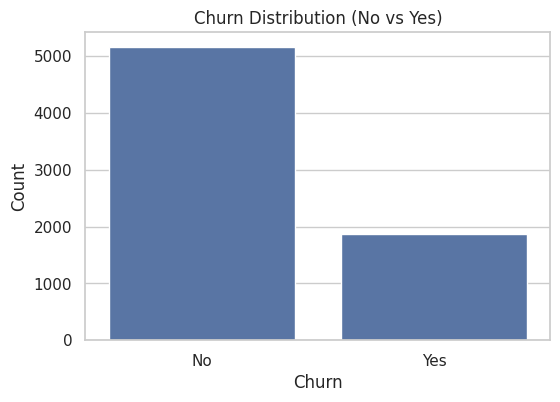

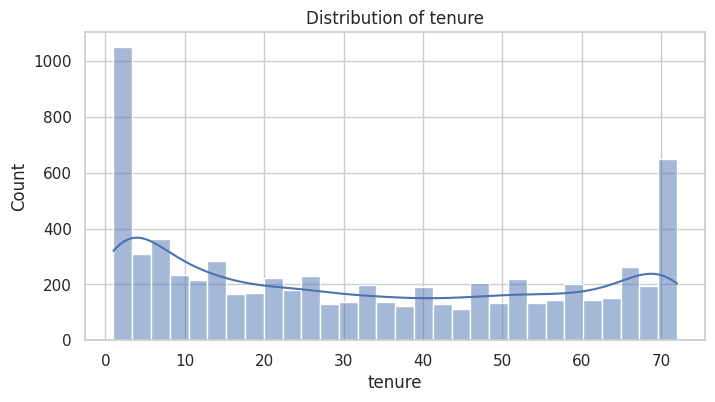

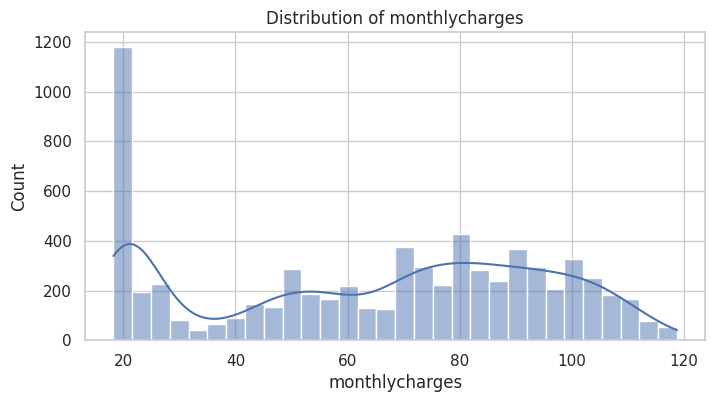

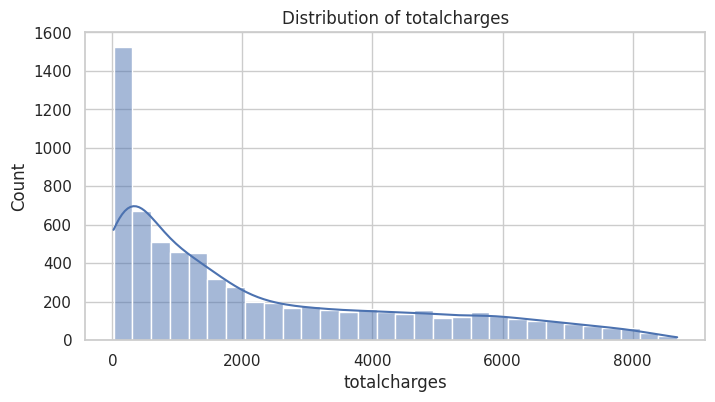

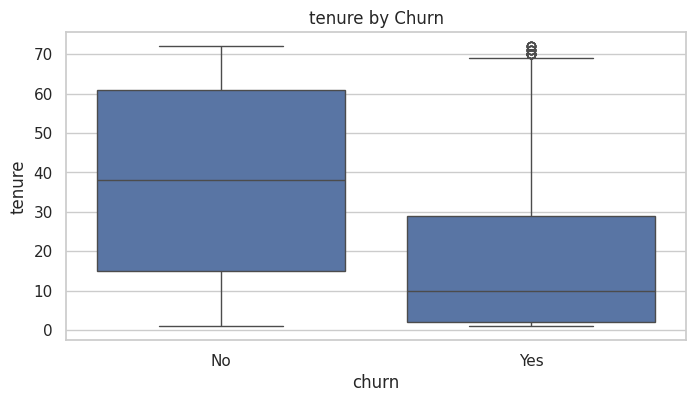

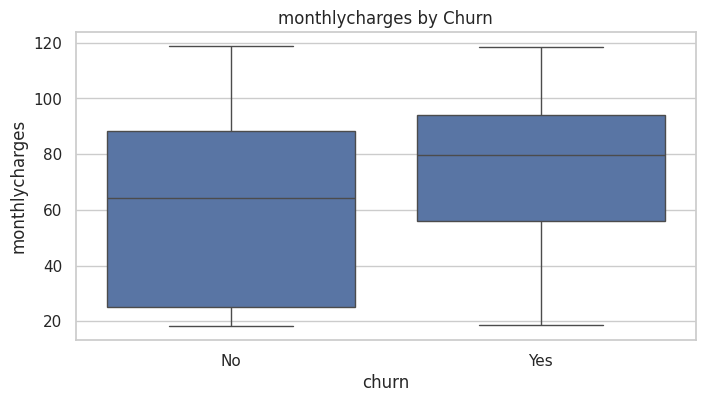

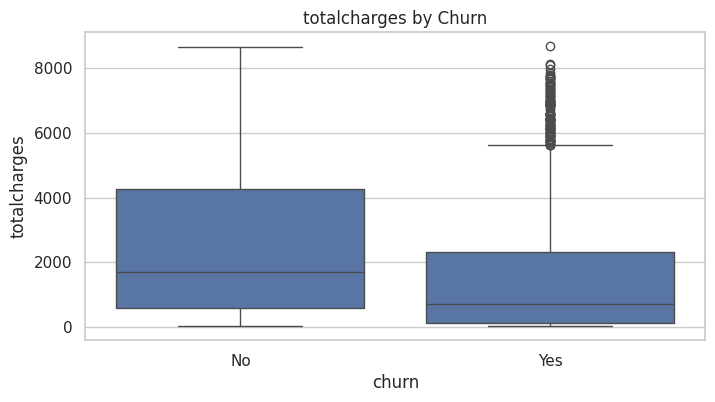

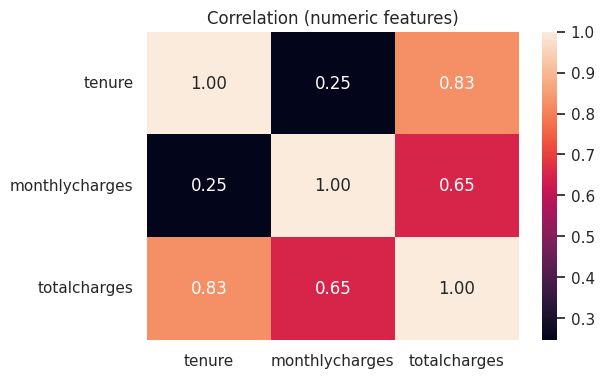


Overall churn rate: 26.58%


In [25]:
# -----------------------------
# Cell: 4 — Task 3: Exploratory Data Analysis (EDA)
# -----------------------------
# Summary statistics (numeric)
display(df.describe().T)

# Categorical summaries (top values)
display(df.describe(include=['object']).T)

# Churn distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution (No vs Yes)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Numerical distributions
num_cols = ['tenure', 'monthlycharges', 'totalcharges']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots: numeric vs churn
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(6,4))
num_df = df[num_cols]
sns.heatmap(num_df.corr(), annot=True, fmt='.2f')
plt.title('Correlation (numeric features)')
plt.show()

# Print churn rate
churn_rate = (df['churn'] == 'Yes').mean() * 100
print(f"\nOverall churn rate: {churn_rate:.2f}%")

In [26]:
# -----------------------------
# Cell: 5 — Task 4: Customer Segmentation Visualization
# -----------------------------
# Create tenure groups
def tenure_category(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 36:
        return '13-36 months'
    else:
        return '37+ months'

if 'tenure' in df.columns:
    df['tenure_group'] = df['tenure'].apply(tenure_category)

# Donut chart for tenure distribution
fig = px.pie(df, names='tenure_group', hole=0.4, title='Customer Distribution by Tenure Group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Avg monthly charges by tenure group
avg_charges = df.groupby('tenure_group', sort=False)['monthlycharges'].mean().reset_index()
avg_charges['monthlycharges'] = avg_charges['monthlycharges'].round(2)
fig = px.bar(avg_charges, x='tenure_group', y='monthlycharges', text='monthlycharges', title='Average Monthly Charges by Tenure Group')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()


In [27]:

# -----------------------------
# Cell: 6 — Task 5: Advanced Analysis
# -----------------------------
# 1) Tenure group statistics
grouped_tenure = df.groupby('tenure_group').agg(
    count=('customerid', 'count'),
    avg_monthlycharges=('monthlycharges', 'mean'),
    avg_totalcharges=('totalcharges', 'mean'),
    churn_rate=('churn', lambda x: (x == 'Yes').mean() * 100)
).reset_index()

# Round numeric columns for display
grouped_tenure['avg_monthlycharges'] = grouped_tenure['avg_monthlycharges'].round(2)
grouped_tenure['avg_totalcharges'] = grouped_tenure['avg_totalcharges'].round(2)
grouped_tenure['churn_rate'] = grouped_tenure['churn_rate'].round(2)

print('\nTenure Group Summary:')
display(grouped_tenure)

# Visual: churn rate by tenure group
fig = px.bar(grouped_tenure, x='tenure_group', y='churn_rate', text='churn_rate', title='Churn Rate by Tenure Group')
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()

# 2) Churn by demographics
demo_cols = []
for candidate in ['gender', 'seniorcitizen', 'partner', 'dependents']:
    if candidate in df.columns:
        demo_cols.append(candidate)

for col in demo_cols:
    churn_demo = (df.groupby(col)['churn'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='churn_percent'))
    print(f"\nChurn % by {col}:")
    display(churn_demo)
    fig = px.bar(churn_demo, x=col, y='churn_percent', text='churn_percent', title=f'Churn % by {col}')
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.show()

# 3) Churn by payment method
if 'paymentmethod' in df.columns:
    churn_payment = (df.groupby('paymentmethod')['churn'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='churn_percent'))
    print('\nChurn % by Payment Method:')
    display(churn_payment)
    fig = px.bar(churn_payment, x='paymentmethod', y='churn_percent', text='churn_percent', title='Churn % by Payment Method')
    fig.update_xaxes(tickangle=35)
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.show()

# 4) Churn by contract type
if 'contract' in df.columns:
    churn_contract = (df.groupby('contract')['churn'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='churn_percent'))
    print('\nChurn % by Contract Type:')
    display(churn_contract)
    fig = px.bar(churn_contract, x='contract', y='churn_percent', text='churn_percent', title='Churn % by Contract Type')
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.show()


Tenure Group Summary:


,tenure_group,count,avg_monthlycharges,avg_totalcharges,churn_rate
0,0-12 months,2175,56.17,276.62,47.68
1,13-36 months,1856,63.25,1513.54,25.54
2,37+ months,3001,72.01,4213.72,11.93



Churn % by gender:


,gender,churn_percent
0,Female,26.959518
1,Male,26.204565



Churn % by seniorcitizen:


,seniorcitizen,churn_percent
0,No,23.650255
1,Yes,41.681261



Churn % by partner:


,partner,churn_percent
0,No,32.976092
1,Yes,19.717065



Churn % by dependents:


,dependents,churn_percent
0,No,31.279140
1,Yes,15.531205



Churn % by Payment Method:


,paymentmethod,churn_percent
0,Bank transfer (automatic),16.731518
1,Credit card (automatic),15.253123
2,Electronic check,45.285412
3,Mailed check,19.201995



Churn % by Contract Type:


,contract,churn_percent
0,Month-to-month,42.709677
1,One year,11.277174
2,Two year,2.848665


In [28]:
# -----------------------------
# Cell: 7 — Insights & Recommendations (Markdown)
# -----------------------------
# ## Key Insights (example - replace with your exact figures)
# 1. Customers on **Month-to-month** contracts have the highest churn rate — consider incentives to lock in customers with longer contracts.
# 2. Customers using **Electronic check** as payment method show significantly higher churn — investigate payment friction and automate reminders.
# 3. Low-tenure customers (0-12 months) show elevated churn — strengthen onboarding and early engagement programs.
#
# ## Recommendations
# - Introduce discounted multi-month plans or trial-to-annual migration offers for new customers.
# - Improve payment UX and follow-up for electronic check users; offer alternative payment incentives.
# - Build targeted retention campaigns for high-risk segments (e.g., low tenure, month-to-month contracts).
#
# ## What to include in the final video
# - Brief intro & objective
# - Quick methods (cleaning + analysis steps)
# - Top 3 visuals (churn distribution, churn by contract, churn by payment)
# - 3 actionable recommendations
# - Link to full notebook or GitHub (if available)

# -----------------------------
# Cell: 8 — Save cleaned dataframe & export summary (optional)
# -----------------------------
# Uncomment to save the cleaned dataset
# df.to_csv('/content/saiket_telco_cleaned.csv', index=False)

# Export key summary tables to CSV for easy inclusion in reports
# grouped_tenure.to_csv('/content/saiket_grouped_tenure_summary.csv', index=False)

print('\nNotebook script completed. Add Markdown cells in your Jupyter/Colab environment for a polished submission.')



Notebook script completed. Add Markdown cells in your Jupyter/Colab environment for a polished submission.
